   
   #   Diabetes Classification-KNN-detailed
Team : Maker Khaoula & Masslak Chaymaa


Importing the libraries that are going to be used 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as pt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Processing Data

In [2]:
#Read the diabetes data and show information about the data
data = pd.read_csv('C:/Users/maker/OneDrive/Desktop/Diab_pyth_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15251 entries, 0 to 15250
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Glucose Before fasting                       15231 non-null  float64
 1   Glucose Anytime                              15233 non-null  float64
 2   Age                                          15223 non-null  float64
 3   Sex                                          15228 non-null  object 
 4   Blood Pressure                               15222 non-null  float64
 5   Family member with Diabetes past or present  15224 non-null  float64
 6   BMI                                          15238 non-null  float64
 7   Pregnancies                                  15237 non-null  float64
 8   percentage of occuring diabetes              15251 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [3]:
#display the shape of data
#it show that the data has 15251 rows and 9 columns
data.shape

(15251, 9)

In [4]:
data.nunique()

Glucose Before fasting                         101
Glucose Anytime                                221
Age                                             53
Sex                                              2
Blood Pressure                                   2
Family member with Diabetes past or present      2
BMI                                             27
Pregnancies                                      2
percentage of occuring diabetes                347
dtype: int64

# Statistical summary for our data

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose Before fasting,15231.0,129.909855,29.290305,80.0,104.0,130.00,155.0,180.0
Glucose Anytime,15233.0,190.399002,64.141917,80.0,134.0,191.00,246.0,300.0
Age,15223.0,44.095382,15.268833,18.0,31.0,44.00,57.0,70.0
Blood Pressure,15222.0,0.499869,0.500016,0.0,0.0,0.00,1.0,1.0
Family member with Diabetes past or present,15224.0,0.506043,0.499980,0.0,0.0,1.00,1.0,1.0
BMI,15238.0,26.953603,7.745629,14.0,20.0,27.00,34.0,40.0
Pregnancies,15237.0,0.249262,0.432600,0.0,0.0,0.00,0.0,1.0
percentage of occuring diabetes,15251.0,51.622828,16.924352,3.5,40.0,52.25,64.5,90.0


# Cleaning the data 

Check for Nan by plotting some the missing values below

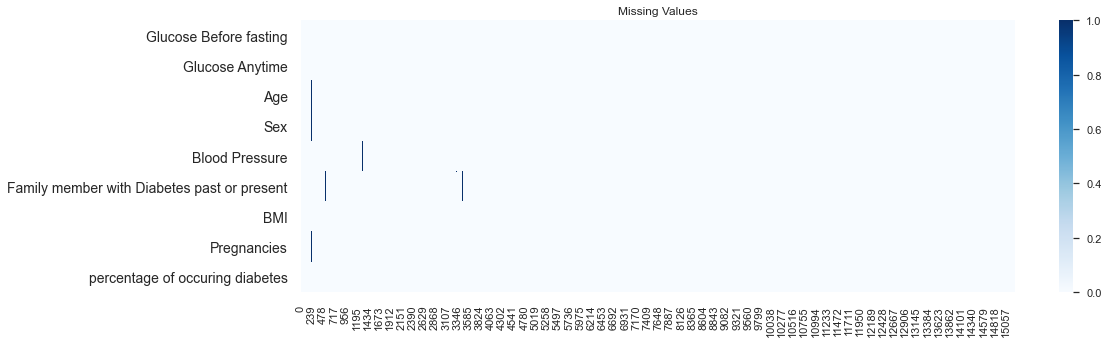

In [6]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))

sns.heatmap(data.T.isna(), cmap='Blues')
ax.set_title('Missing Values')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

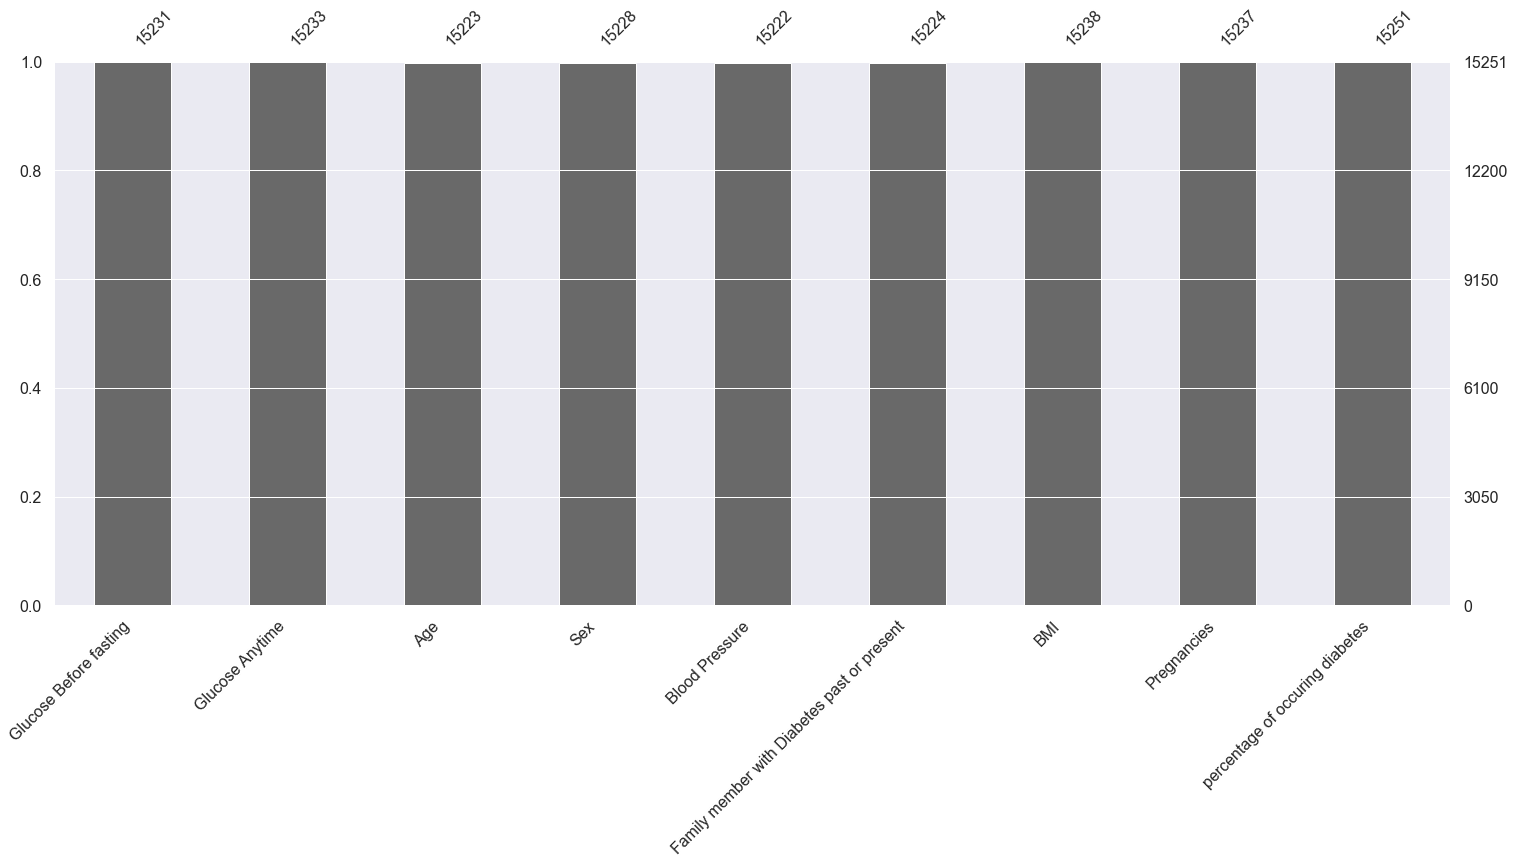

In [7]:
msno.bar(data)
plt.show()

In [8]:
data.isna().sum()

Glucose Before fasting                         20
Glucose Anytime                                18
Age                                            28
Sex                                            23
Blood Pressure                                 29
Family member with Diabetes past or present    27
BMI                                            13
Pregnancies                                    14
percentage of occuring diabetes                 0
dtype: int64

In [9]:
data.dropna(inplace=True) 
data.isnull().sum()

Glucose Before fasting                         0
Glucose Anytime                                0
Age                                            0
Sex                                            0
Blood Pressure                                 0
Family member with Diabetes past or present    0
BMI                                            0
Pregnancies                                    0
percentage of occuring diabetes                0
dtype: int64

# Data Visualisation

countplot showing ages of patients 

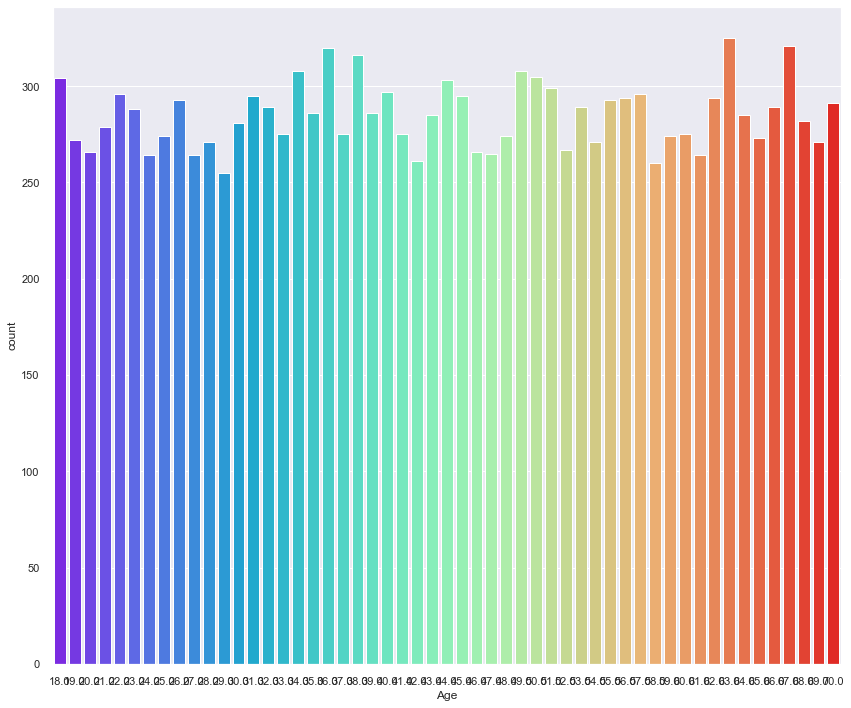

In [10]:
plt.figure(figsize=(12,10))
sns.countplot(data.Age,palette='rainbow')
plt.tight_layout()

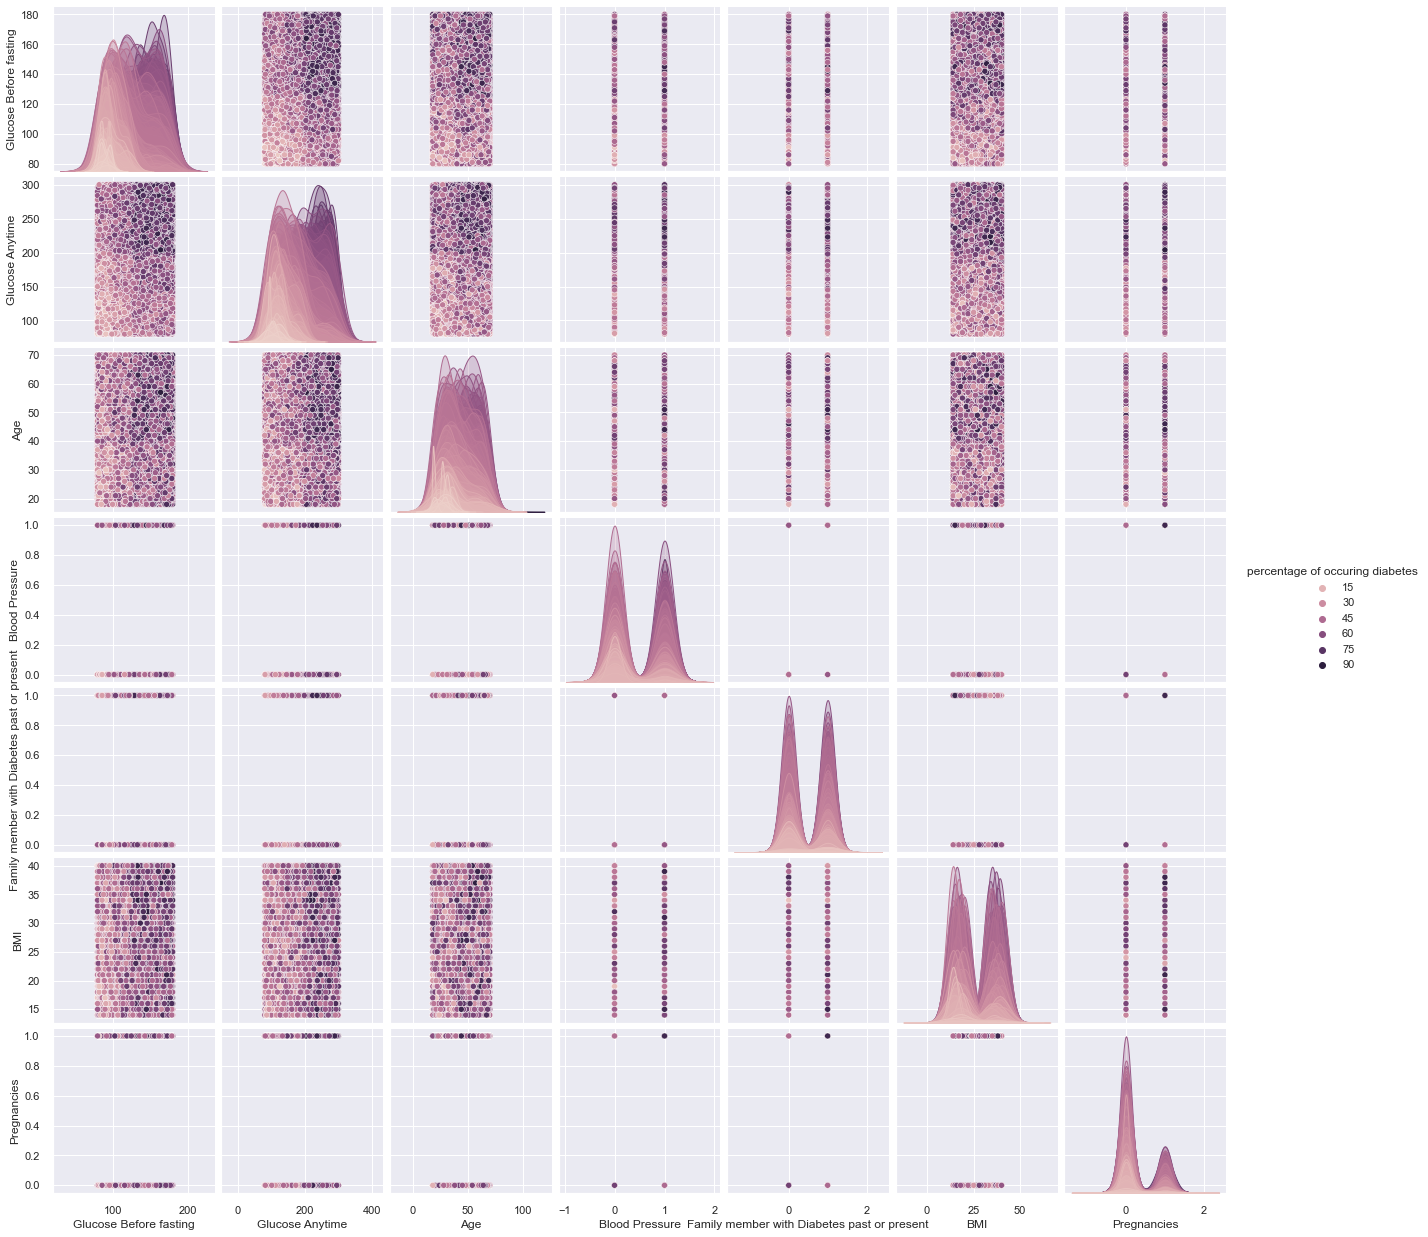

In [11]:
p=sns.pairplot(data, hue = 'percentage of occuring diabetes')

Male      7561
Female    7543
Name: Sex, dtype: int64


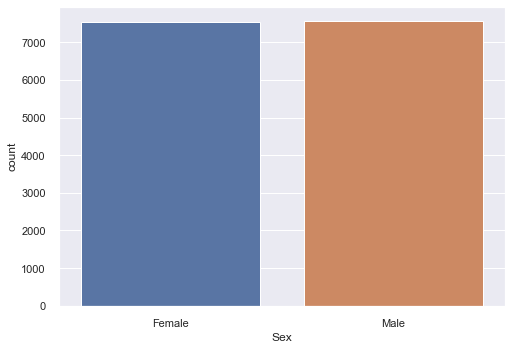

In [12]:
print(data.Sex.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='Sex')

<AxesSubplot:>

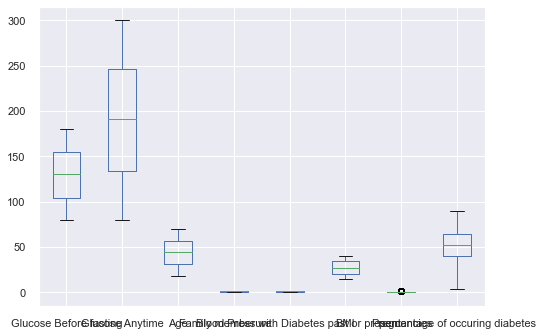

In [13]:
data.plot(kind= 'box')

<AxesSubplot:>

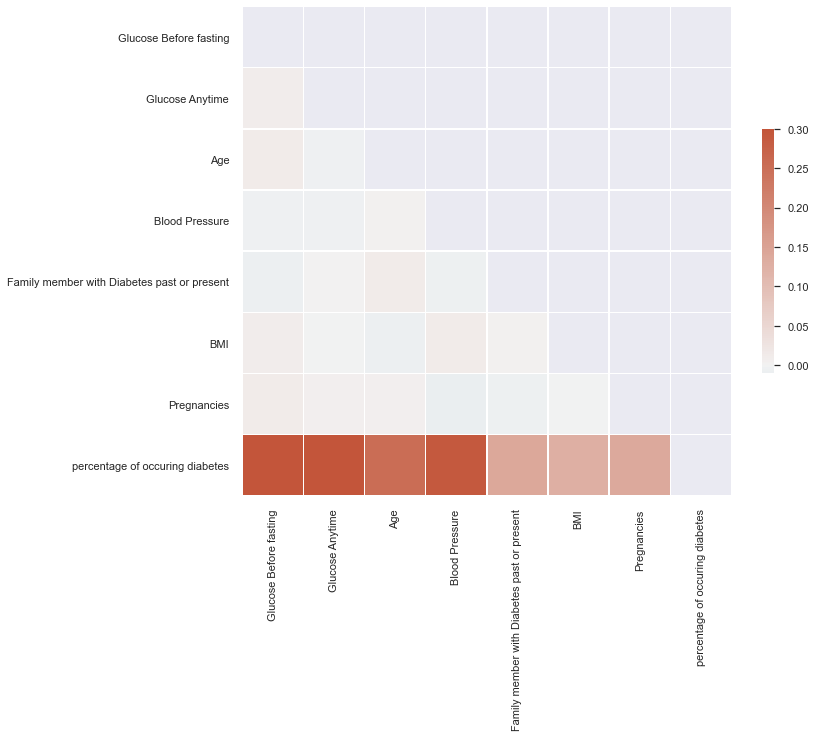

In [14]:
# compute the corr matrix
corr = data.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

<AxesSubplot:xlabel='BMI', ylabel='Density'>

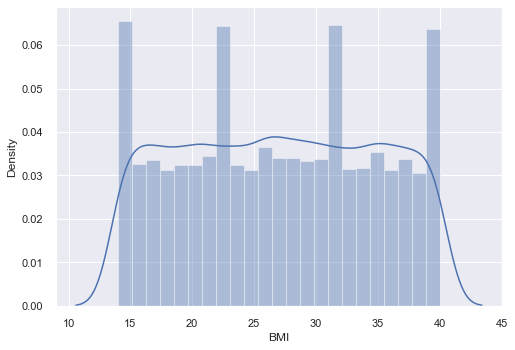

In [15]:
sns.distplot(data['BMI'])

In [16]:
#we will convert Sex column into a binary format
data.Sex[data.Sex == 'Male'] = 1
data.Sex[data.Sex == 'Female'] = 0
data.head(7) #first 7 rows to check the changement

,Glucose Before fasting,Glucose Anytime,Age,Sex,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,percentage of occuring diabetes
0,153.0,225.0,57.0,0,0.0,0.0,18.0,1.0,69.50
1,156.0,211.0,63.0,1,0.0,1.0,17.0,0.0,69.25
2,85.0,139.0,60.0,1,0.0,0.0,18.0,0.0,14.50
3,126.0,149.0,40.0,1,1.0,0.0,28.0,0.0,62.00
4,117.0,156.0,46.0,1,1.0,1.0,29.0,0.0,52.25
5,151.0,286.0,38.0,0,1.0,1.0,20.0,0.0,70.00
6,106.0,277.0,56.0,1,0.0,0.0,35.0,0.0,53.75


# Data processing

In [17]:
cdata = data.copy()

# Let's convert percentage of diabetes column to binary format.
cdata['diabetes'] = (cdata["percentage of occuring diabetes"] > 50).astype(int)
cdata.drop("percentage of occuring diabetes", axis=1, inplace=True)
cdata.head()

,Glucose Before fasting,Glucose Anytime,Age,Sex,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,diabetes
0,153.0,225.0,57.0,0,0.0,0.0,18.0,1.0,1
1,156.0,211.0,63.0,1,0.0,1.0,17.0,0.0,1
2,85.0,139.0,60.0,1,0.0,0.0,18.0,0.0,0
3,126.0,149.0,40.0,1,1.0,0.0,28.0,0.0,1
4,117.0,156.0,46.0,1,1.0,1.0,29.0,0.0,1


# Data Standardization+Splitting the dataset

In [18]:
#Split the data into training set and testing set using train_test_split

scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(cdata.drop(["diabetes"],axis = 1),),
        columns=['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Sex', 'Blood Pressure',
       'Family member with Diabetes past or present', 'BMI','Pregnancies'])
X.head()

,Glucose Before fasting,Glucose Anytime,Age,Sex,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies
0,0.788223,0.540087,0.844042,-1.001192,-1.000795,-1.012257,-1.156367,1.736035
1,0.890616,0.321695,1.236789,0.998809,-1.000795,0.987891,-1.285470,-0.576025
2,-1.532683,-0.801465,1.040415,0.998809,-1.000795,-1.012257,-1.156367,-0.576025
3,-0.133313,-0.645470,-0.268739,0.998809,0.999206,-1.012257,0.134659,-0.576025
4,-0.440492,-0.536274,0.124007,0.998809,0.999206,0.987891,0.263761,-0.576025


In [19]:
y = cdata.diabetes
y.head()

0    1
1    1
2    0
3    1
4    1
Name: diabetes, dtype: int32

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

# Building the K Nearest Neighbors Classifier

In [21]:
#Create a for loop that trains various KNN models with different k values, then keep track
#of the error_rate for each of these models with a list.  

test_scores = []
train_scores = []
error_rate = []


for i in range(1,50):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    error_rate.append(np.mean(pred_i != y_test))

# Choose a K value based on the error rate

Text(0, 0.5, 'Error Rate')

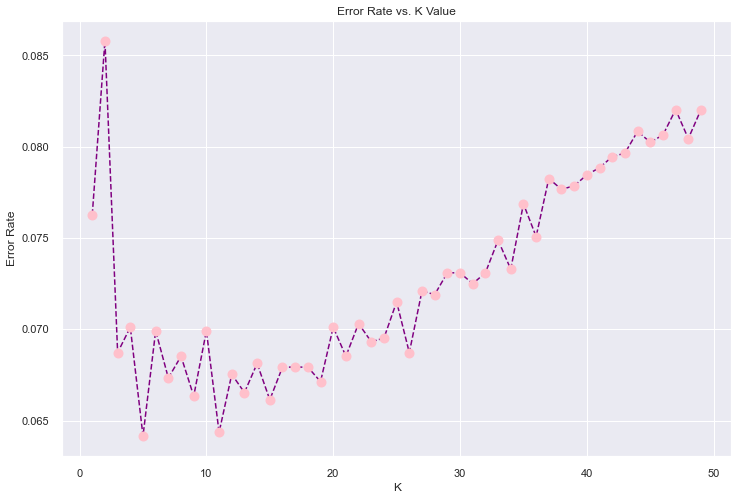

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),error_rate,color='purple', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Choose a K value based on the accuracy rate

Text(0, 0.5, 'Accuracy Rate')

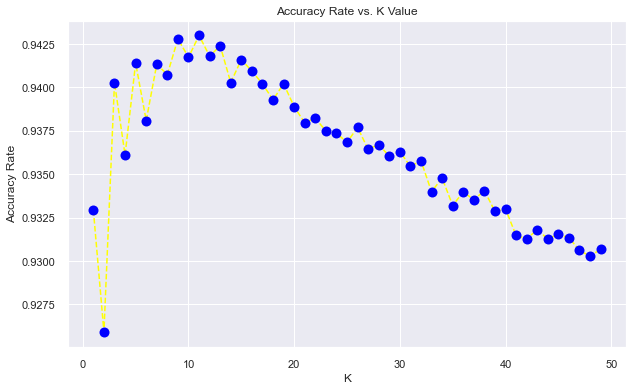

In [23]:
accuracy_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,cdata["diabetes"],cv=10)
    accuracy_rate.append(score.mean())

pt.figure(figsize=(10,6))
pt.plot(range(1,50),accuracy_rate,color='yellow', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
pt.title('Accuracy Rate vs. K Value')
pt.xlabel('K')
pt.ylabel('Accuracy Rate')

In [24]:
#score that comes from testing on the same datapoints that were used for training and the one we split in the beginning to be used for testing 

max_train_score = max(train_scores)
max_test_score = max(test_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 93.58490566037736 % and k = [5]


The best result is captured at k = 5 hence 5 is used for the final model

# Visualisation of the result

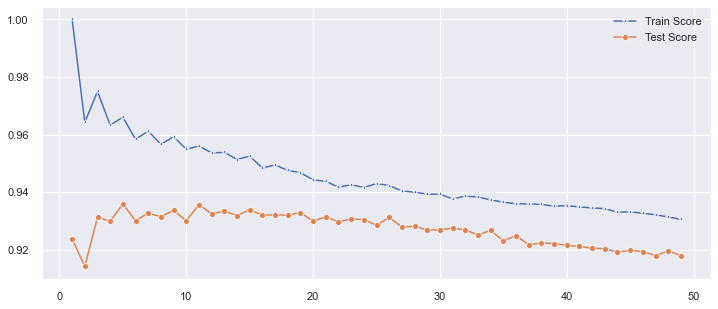

In [25]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

In [26]:
#Let's run the algorithm with the new K value which equals 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

knn.score(X_test,y_test)

0.9358490566037736

Text(0.5, 22.5, 'Predicted')

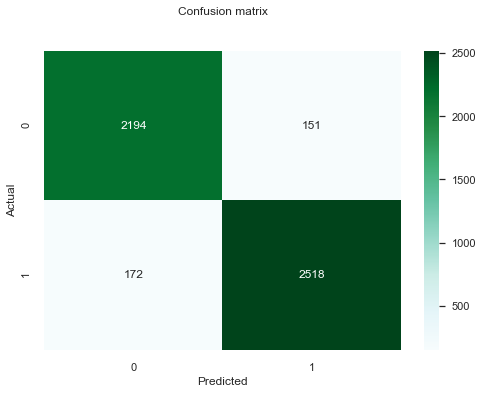

In [27]:
#plot the confusion matrix
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, prediction)), annot=True, cmap="BuGn" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')


# Choosing P value for a better accuracy

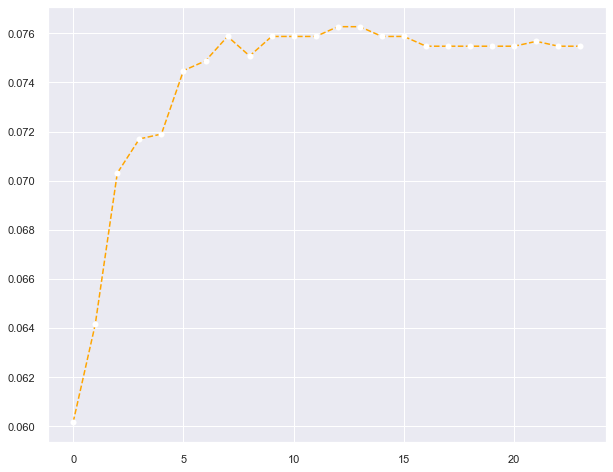

In [30]:
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=5,p=i)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    error_rate.append(np.mean(prediction != y_test))
plt.figure(figsize=(10,8))
plt.plot(range(len(error_rate)),error_rate,marker='o',markerfacecolor='white',linestyle='--',color='orange')

In [36]:
#Train, fit a KNN model on the training set then predict values for testing data.
knn = KNeighborsClassifier(n_neighbors=5,p=1)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print("The Accuracy of the model with K=5 and p = 1 equal {} %".format(accuracy_score(y_test, prediction)*100))

The Accuracy of the model with K=5 and p = 1 equal 93.98212512413107 %


# Model performance

# Comparaison between TPR and FPR i.e ROC

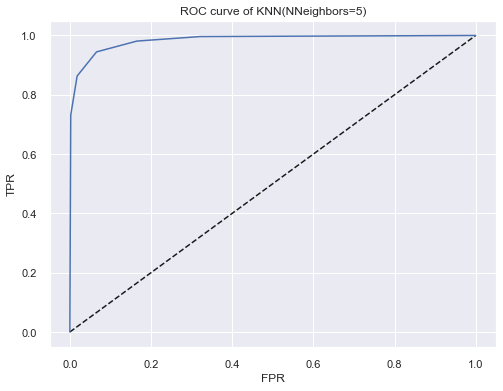

0.9841368568733602

In [41]:
yPROB_pred = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, yPROB_pred)
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve of KNN(NNeighbors=5)')
plt.show()
roc_auc_score(y_test,yPROB_pred)


# Confusion Matrix

Text(0.5, 22.5, 'Predicted')

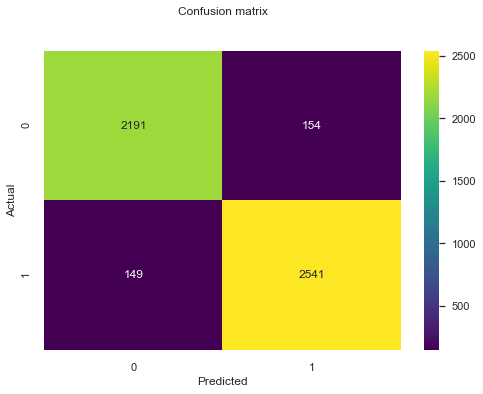

In [44]:
prediction2 = knn.predict(X_test)
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, prediction2)), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')


the model predicted that 2191 persons didn't have the disease and in real they hadn't 

the model predicted that 154 persons didn't have the disease and in real they had 


the model predicted that 149 persons have the disease and in real they hadn't 


the model predicted that 2541 persons have the disease and in real they had 

In [45]:
confusion_matrix(y_test,prediction2)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2191,154,2345
1,149,2541,2690
All,2340,2695,5035
